In [20]:
import matplotlib.pyplot as plt
import numpy as np
# import Functions as AC
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import astropy.constants as const

# Question 1

Consider a source with spectral shape $L_{\nu}\propto\nu^\alpha$. Show that in this case: $f_\nu(\nu_o)=\frac{L_\nu(\nu_o)}{4\pi D_L^2}(1+z)^{1+\alpha}$

Because of the proportionality between the mono luminosity and the frequency we can use $L_\nu(\nu)=L_o\nu^\alpha$

The emitted frequency is related to the observed via: $\nu_e=(1+z)\nu_o$

$\therefore$ $L_\nu(\nu_e)=L_o((1+z)\nu_o)^\alpha=L_o\nu^\alpha(1+z)^\alpha$ 

which is $=L_\nu(\nu_o)(1+z)^\alpha$

Plugging that into $f_\nu(\nu_o)=\frac{L_\nu(\nu_e)}{4\pi D_L^2}(1+z)$

gives $\frac{L_\nu(\nu_o)}{4\pi D_L^2}(1+z)^{\alpha}(1+z)=\frac{L_\nu(\nu_o)}{4\pi D_L^2}(1+z)^{1+\alpha}$

$\blacksquare$

# Question 2

The observed AB magnitude of a source as measured through a filter at an observed frequency $\nu_F$ is given by: $m_{AB,F}=-2.5\log_{10}f_\nu(\nu_F)-48.6$, if the flux density is measured in units of $[f_\nu]=erg/s/cm^2/Hz$. The absolute magnitude M is defined to be the apparent magnitude that the source would have, if it were at a distance of 10 pc, at rest (i.e., not redshifted)

For the above source with a power law spectral index $\alpha$, show that: $m_{AB,F}=M_{AB,F}+DM-2.5(1+\alpha)\log_{10}(1+z)$

where we have used the definition of the distance modulus: $DM=5\log_{10}(D_L/10pc)$ The last term in the above equation is called the K-correction. It captures the transformations between
observed and rest-frame photometric measurements. So, if we define $K_F=-2.5(1+\alpha)\log_{10}(1+z)$, the transformation between absolute and observed magnitudes can be simplified to: $m_{AB,F}=M_{AB,F}+DM+K_F$

starting with our expression for the apparent magnitude lets plug in our expression for $f_\nu(\nu_F)$

Giving us: $m_{AB,F}=-2.5\log_{10}(\frac{L_\nu}{4\pi D_L^2}(1+z)^{1+\alpha})-48.6$

Also recall $M_{AB,F}=-2.5\log_{10}(\frac{L_\nu}{4\pi (10pc)^2})-48.6$

$=-2.5\log_{10}(L_\nu)+2.5\log_{10}(4\pi D_L^2)-2.5(1+\alpha)\log_{10}(1+z)-48.6$

and similarly with M $=-2.5\log_{10}(L_\nu)+2.5\log_{10}(4\pi (10 pc)^2)-48.6$

Now we can subtract M from m giving:

$m_{AB}-M_{AB}=2.5\log(\frac{D_L^2}{(10pc)^2})-2.5(1+\alpha)\log_{10}(1+z)$

by noticing that the first term is DM and the second term is the K correction, we can dubtract $M_{AB}$ from both sides giving us our expression for $m_{AB}$

$m_{AB,F}=M_{AB,F}+DM-K_F$

$\blacksquare$


# Question 3

z=10

$M_{A,B,UV}=-21$

$\alpha = 0$

find $m_{A,B,UV}$

In [ ]:
zobs = 10.0
D_L = cosmo.luminosity_distance(zobs)
D_A = cosmo.angular_diameter_distance(zobs)
DM = cosmo.distmod(zobs)
M=-21


$m(z,v_o)=M(v_o)+DM+K(z,v_o)$

$DM=5\log_{10}\frac{D_L}{10 pc}$

$K(z,v_o)=-2.5\log_{10}(\frac{L_{\nu}(\nu_e)}{L_{\nu}(\nu_o)}(1+z))$

For a flat spectrum ($\alpha=0$), $\frac{L_{\nu}(\nu_e)}{L_{\nu}(\nu_o)}=1$

$\therefore$

In [19]:
m = M + DM.value - 2.5*np.log10(1+zobs)
print(r'the apparent magnitude m_{A,B,UV} is: ' + str(m))

the apparent magnitude m_{A,B,UV} is: 26.523029911226924


# Question 4

A typical galaxy at z=10 has a physical size of 0.5 kpc. How large would this galaxy appear on the sky, i.e.,
what is the observed angle of such a source in arcseconds? What would the angular size of this same
source be at z=2? Discuss the meaning of these two results in terms of the distances that we have
introduced in the last class

$d = D_A * \Delta\theta$

$\theta=\frac{physical\,size}{D_A}$

$D_A = \frac{D_L}{(1+z)^2}$

In [39]:
size = 0.0005*u.Mpc
cosmo.kpc_proper_per_arcmin(zobs)

<Quantity 254.82560954 kpc / arcmin>

In [40]:
print(size)


0.0005 Mpc


In [43]:
# For z = 10
theta10 = (size / D_A)* (206265 * u.arcsec)
print(theta10)


0.11772768142968475 arcsec


In [45]:
# For z = 2
D_A2 = cosmo.angular_diameter_distance(2)
theta2 = (size/D_A2)* (206265 * u.arcsec)
print(theta2)

0.05828682941920389 arcsec


As we go further and further back in time (higher z), the angular distance will decrease causing the angular size of the object to increase with z.

That is why at z=10, $\theta=.117$ arcseconds whereas at z=2, $\theta=.058$ arcseconds

# Question 5

Reproduce the figure shown on the second to last slide of class 09 for the Planck18 cosmology. I.e. plot
redshift on the x-axis and on the y-axis show (1) the angular diameter distance, (2) the comoving radial
distance, (3) the luminosity distance, and (4) the light travel distance.
Note: the light travel distance is defined as the distance a photon emitted at redshift z has traveled towards
us. You can use the so-called look-back time (cosmo.lookback_time) to compute this.

In [95]:
z=np.linspace(0.0001, 1000, 10000)

DA = []
DL = []
DM  = []
DLi = []
for ii in range(len(z)):
    DA.append(cosmo.angular_diameter_distance(z[ii]).to_value(u.Mpc))
    DL.append(cosmo.luminosity_distance(z[ii]).to_value(u.Mpc))
    DM.append(cosmo.comoving_transverse_distance(z[ii]).to_value(u.Mpc))
    lookback = cosmo.lookback_time(z[ii])                                    
    DLi.append((const.c * lookback).to(u.Mpc).value)

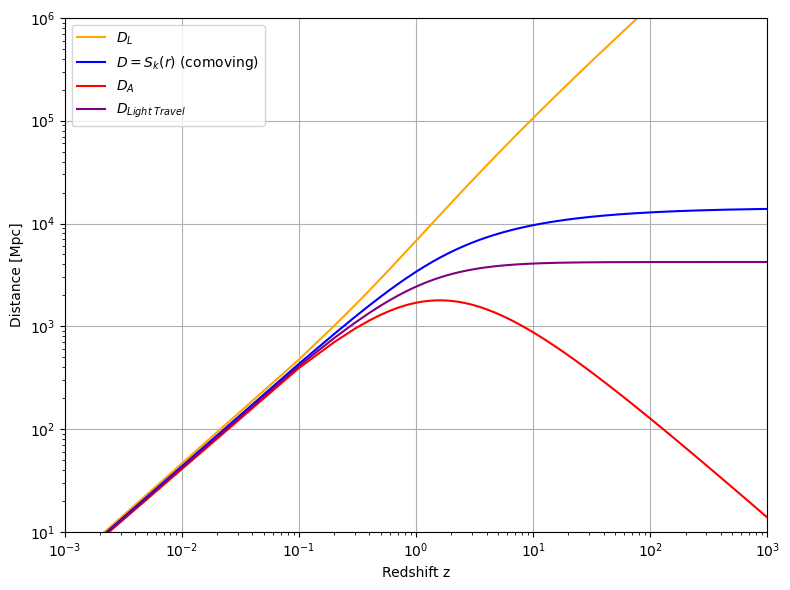

In [98]:
plt.figure(figsize=(8,6))

plt.plot(z, DL,  label=r"$D_L$", color="orange")
plt.plot(z, DM,  label=r"$D = S_k(r)$ (comoving)", color="blue")
plt.plot(z, DA,  label=r"$D_A$", color="red")
plt.plot(z, DLi,  label=r"$D_{Light\;Travel}$", color="purple")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Redshift z")
plt.ylabel("Distance [Mpc]")
plt.xlim(.001, 1000)
plt.ylim(10,1000000)

plt.legend()
plt.tight_layout()
plt.xticks()
plt.grid()
plt.show()